In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
from geoplot import utils
import geoplot as gplt
from geoplot import crs as gcrs
import geopandas as gpd
import pandas as pd
import shapely
import numpy as np
import matplotlib.pyplot as plt

In [3]:
savefig_kwargs = {'bbox_inches': 'tight', 'pad_inches': 0.25}

In [ ]:
!mkdir ../figures/pointplot
!mkdir ../figures/kdeplot
!mkdir ../figures/polyplot
!mkdir ../figures/cartogram
!mkdir ../figures/sankey
!mkdir ../figures/choropleth
!mkdir ../figures/voronoi
!mkdir ../figures/quadtree

# Load example data

# Pointplot

In [4]:
cities = gpd.read_file(gplt.datasets.get_path('usa_cities'))

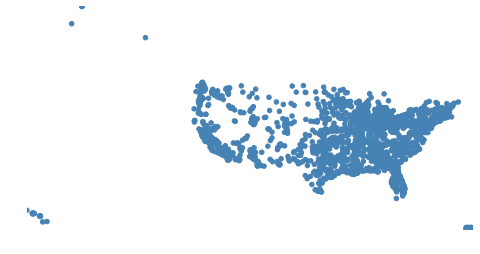

In [5]:
gplt.pointplot(cities)
plt.savefig('../figures/pointplot/pointplot-initial.png', **savefig_kwargs)

/Users/alex/miniconda3/envs/geoplot-dev/lib/python3.6/site-packages/scipy/stats/stats.py:1633: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


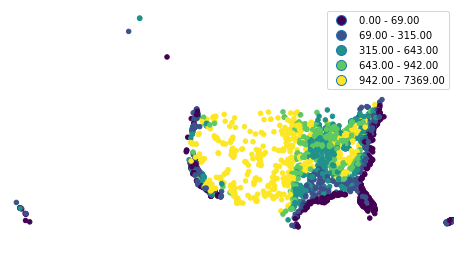

In [6]:
gplt.pointplot(cities, projection=gcrs.AlbersEqualArea(), hue='ELEV_IN_FT', legend=True)
plt.savefig('../figures/pointplot/pointplot-legend.png', **savefig_kwargs)

/Users/alex/miniconda3/envs/geoplot-dev/lib/python3.6/site-packages/scipy/stats/stats.py:1633: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


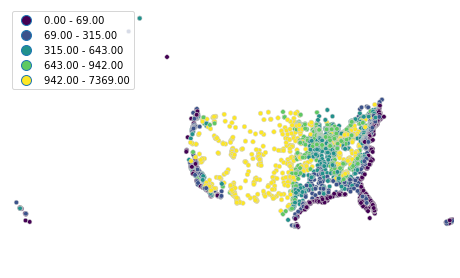

In [7]:
gplt.pointplot(
    cities, projection=gcrs.AlbersEqualArea(), 
    hue='ELEV_IN_FT',
    legend=True, legend_kwargs={'loc': 'upper left'},
    edgecolor='lightgray', linewidth=0.5
)
plt.savefig('../figures/pointplot/pointplot-kwargs.png', **savefig_kwargs)

/Users/alex/miniconda3/envs/geoplot-dev/lib/python3.6/site-packages/scipy/stats/stats.py:1633: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


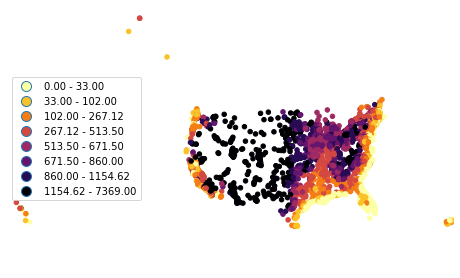

In [8]:
gplt.pointplot(
    cities, projection=gcrs.AlbersEqualArea(),
    hue='ELEV_IN_FT', k=8, cmap='inferno_r',
    legend=True
)
plt.savefig('../figures/pointplot/pointplot-k.png', **savefig_kwargs)

/Users/alex/miniconda3/envs/geoplot-dev/lib/python3.6/site-packages/scipy/stats/stats.py:1633: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


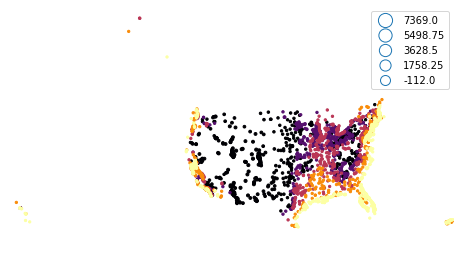

In [9]:
gplt.pointplot(
    cities, projection=gcrs.AlbersEqualArea(), 
    hue='ELEV_IN_FT', scale='ELEV_IN_FT', limits=(5, 10), cmap='inferno_r',
    legend=True, legend_var='scale'
)
plt.savefig('../figures/pointplot/pointplot-scale.png', **savefig_kwargs)

# Polyplot

In [10]:
boroughs = gpd.read_file(gplt.datasets.get_path('nyc_boroughs'))
collisions = gpd.read_file(gplt.datasets.get_path('nyc_collision_factors'))

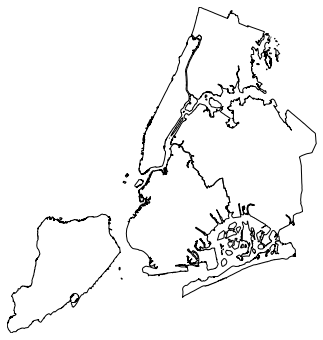

In [11]:
gplt.polyplot(boroughs, projection=gcrs.AlbersEqualArea())
plt.savefig('../figures/polyplot/polyplot-initial.png', **savefig_kwargs)

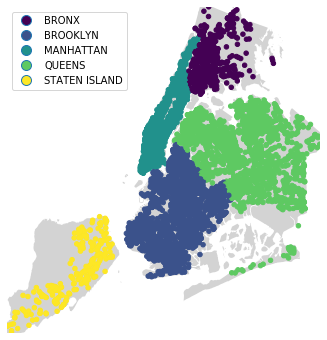

In [12]:
ax = gplt.polyplot(
    boroughs, projection=gcrs.AlbersEqualArea(),
    edgecolor='None', facecolor='lightgray'
)
gplt.pointplot(
    collisions[collisions['BOROUGH'].notnull()],
    hue='BOROUGH', ax=ax, legend=True
)
plt.savefig('../figures/polyplot/polyplot-stacked.png', **savefig_kwargs)

# Choropleth

In [13]:
contiguous_usa = gpd.read_file(gplt.datasets.get_path('contiguous_usa'))

/Users/alex/miniconda3/envs/geoplot-dev/lib/python3.6/site-packages/scipy/stats/stats.py:1633: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


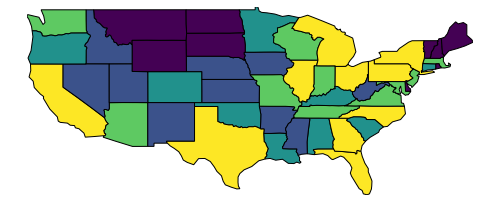

In [14]:
gplt.choropleth(contiguous_usa, hue='population')
plt.savefig('../figures/choropleth/choropleth-initial.png', **savefig_kwargs)

/Users/alex/miniconda3/envs/geoplot-dev/lib/python3.6/site-packages/scipy/stats/stats.py:1633: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


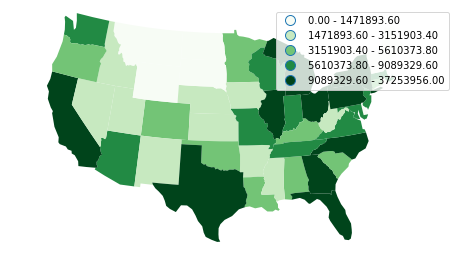

In [15]:
gplt.choropleth(
    contiguous_usa, hue='population', projection=gcrs.AlbersEqualArea(),
    cmap='Greens', k=5, legend=True
)
plt.savefig('../figures/choropleth/choropleth-cmap.png', **savefig_kwargs)

/Users/alex/miniconda3/envs/geoplot-dev/lib/python3.6/site-packages/scipy/stats/stats.py:1633: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


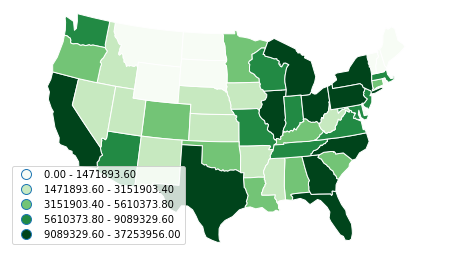

In [16]:
gplt.choropleth(
    contiguous_usa, hue='population', projection=gcrs.AlbersEqualArea(),
    edgecolor='white', linewidth=1,
    cmap='Greens', legend=True, legend_kwargs={'loc': 'lower left'}
)
plt.savefig('../figures/choropleth/choropleth-legend-kwargs.png', **savefig_kwargs)

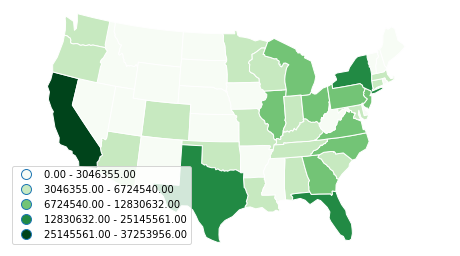

In [17]:
gplt.choropleth(
    contiguous_usa, hue='population', projection=gcrs.AlbersEqualArea(),
    edgecolor='white', linewidth=1,
    cmap='Greens', legend=True, legend_kwargs={'loc': 'lower left'},
    scheme='fisher_jenks'
)
plt.savefig('../figures/choropleth/choropleth-scheme.png', **savefig_kwargs)

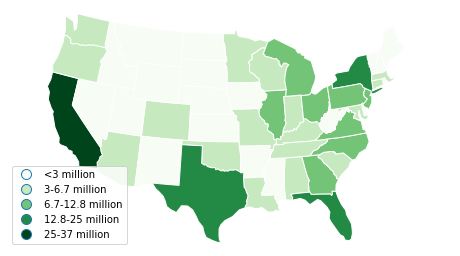

In [18]:
gplt.choropleth(
    contiguous_usa, hue='population', projection=gcrs.AlbersEqualArea(),
    edgecolor='white', linewidth=1,
    cmap='Greens', legend=True, legend_kwargs={'loc': 'lower left'},
    scheme='fisher_jenks',
    legend_labels=[
        '<3 million', '3-6.7 million', '6.7-12.8 million',
        '12.8-25 million', '25-37 million'
    ]
)
plt.savefig('../figures/choropleth/choropleth-labels.png', **savefig_kwargs)

# Cartogram

In [19]:
boroughs = gpd.read_file(gplt.datasets.get_path('nyc_boroughs'))
contiguous_usa = gpd.read_file(gplt.datasets.get_path('contiguous_usa'))

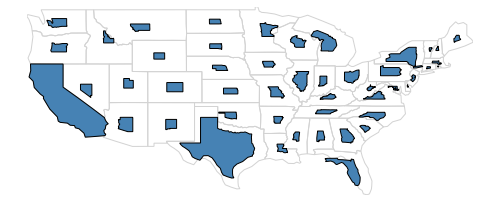

In [20]:
gplt.cartogram(contiguous_usa, scale='population')
plt.savefig('../figures/cartogram/cartogram-initial.png', **savefig_kwargs)

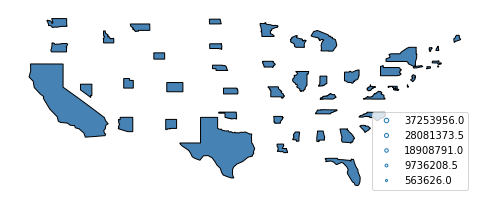

In [21]:
gplt.cartogram(
    contiguous_usa, scale='population', trace=False, legend=True
)
plt.savefig('../figures/cartogram/cartogram-trace-legend.png', **savefig_kwargs)

TODO: break from below.

In [ ]:
# gplt.cartogram(boroughs, scale='Population Density', projection=gcrs.AlbersEqualArea(),
#                trace=False, legend=True, legend_kwargs={'loc': 'upper left'})
# plt.savefig('../figures/cartogram/cartogram-legend-kwargs.png', **savefig_kwargs)

In [ ]:
# gplt.cartogram(boroughs, scale='Population Density', projection=gcrs.AlbersEqualArea(), legend=True,
#                legend_values=[2.32779655e-07, 6.39683197e-07, 1.01364661e-06, 1.17380941e-06, 2.33642596e-06][::-1],
#                legend_labels=['Manhattan', 'Brooklyn', 'Queens', 'The Bronx', 'Staten Island'],
#                legend_kwargs={'loc': 'upper left'})
# plt.savefig('../figures/cartogram/cartogram-legend-labels.png', **savefig_kwargs)

In [ ]:
# gplt.cartogram(boroughs, scale='Population Density', projection=gcrs.AlbersEqualArea(),
#                edgecolor='darkgreen')
# plt.savefig('../figures/cartogram/cartogram-kwargs.png', **savefig_kwargs)

In [ ]:
# gplt.cartogram(boroughs, scale='Population Density', projection=gcrs.AlbersEqualArea(),
#                trace_kwargs={'edgecolor': 'lightgreen'})
# plt.savefig('../figures/cartogram/cartogram-trace-kwargs.png', **savefig_kwargs)

In [ ]:
# gplt.cartogram(boroughs, scale='Population Density', projection=gcrs.AlbersEqualArea(),
#                limits=(0.5, 1))
# plt.savefig('../figures/cartogram/cartogram-limits.png', **savefig_kwargs)

In [ ]:
# def trivial_scale(minval, maxval):
#     def scalar(val):
#         return 0.5
#     return scalar

# gplt.cartogram(boroughs, scale='Population Density', projection=gcrs.AlbersEqualArea(),
#                limits=(0.5, 1), scale_func=trivial_scale)
# plt.savefig('../figures/cartogram/cartogram-scale-func.png', **savefig_kwargs)

In [ ]:
# gplt.cartogram(boroughs, scale='Population Density', projection=gcrs.AlbersEqualArea(),
#                hue='Population Density', k=None, cmap='Blues')
# plt.savefig('../figures/cartogram/cartogram-hue.png', **savefig_kwargs)

## KDEPlot

In [22]:
boroughs = gpd.read_file(gplt.datasets.get_path('nyc_boroughs'))
collisions = gpd.read_file(gplt.datasets.get_path('nyc_collision_factors'))

/Users/alex/miniconda3/envs/geoplot-dev/lib/python3.6/site-packages/scipy/stats/stats.py:1633: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


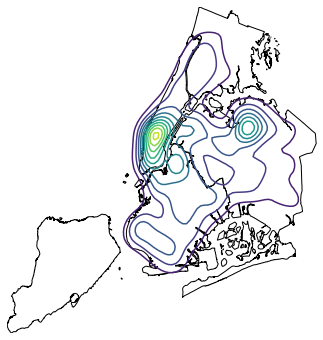

In [23]:
ax = gplt.kdeplot(collisions, projection=gcrs.AlbersEqualArea())
gplt.polyplot(boroughs, ax=ax)
plt.savefig('../figures/kdeplot/kdeplot-initial.png', **savefig_kwargs)

/Users/alex/miniconda3/envs/geoplot-dev/lib/python3.6/site-packages/scipy/stats/stats.py:1633: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


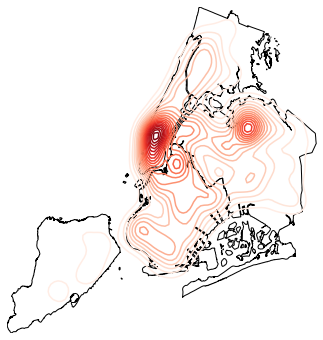

In [24]:
ax = gplt.kdeplot(collisions, projection=gcrs.AlbersEqualArea(), n_levels=20, cmap='Reds')
gplt.polyplot(boroughs, ax=ax)
plt.savefig('../figures/kdeplot/kdeplot-shade.png', **savefig_kwargs)

/Users/alex/miniconda3/envs/geoplot-dev/lib/python3.6/site-packages/scipy/stats/stats.py:1633: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


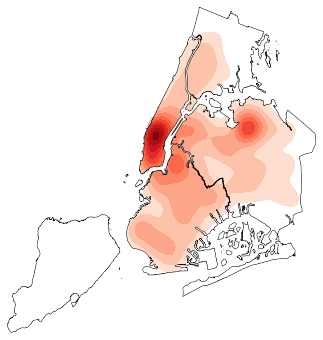

In [25]:
ax = gplt.kdeplot(
    collisions, projection=gcrs.AlbersEqualArea(), cmap='Reds',
    shade=True,
    clip=boroughs
)
gplt.polyplot(boroughs, ax=ax, zorder=1)
plt.savefig('../figures/kdeplot/kdeplot-clip.png', **savefig_kwargs)

/Users/alex/miniconda3/envs/geoplot-dev/lib/python3.6/site-packages/scipy/stats/stats.py:1633: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


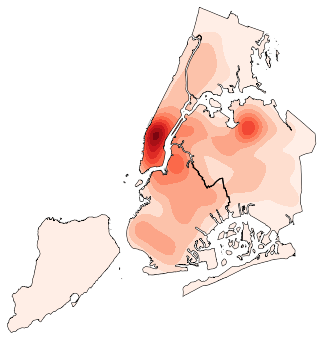

In [26]:
ax = gplt.kdeplot(
    collisions, projection=gcrs.AlbersEqualArea(), cmap='Reds',
    shade=True, shade_lowest=True,
    clip=boroughs.geometry
)
gplt.polyplot(boroughs, ax=ax, zorder=1)
plt.savefig('../figures/kdeplot/kdeplot-shade-lowest.png', **savefig_kwargs)

## Sankey

In [27]:
la_flights = gpd.read_file(gplt.datasets.get_path('la_flights'))
world = gpd.read_file(gplt.datasets.get_path('world'))
dc = gpd.read_file(gplt.datasets.get_path('dc_roads'))

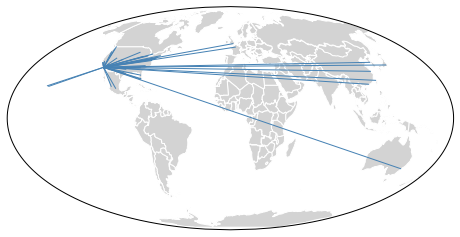

In [28]:
ax = gplt.sankey(
    la_flights, projection=gcrs.Mollweide()
)
gplt.polyplot(
    world, ax=ax, facecolor='lightgray', edgecolor='white'
)
ax.set_global(); ax.outline_patch.set_visible(True)
plt.savefig('../figures/sankey/sankey-geospatial-context.png', **savefig_kwargs)

/Users/alex/miniconda3/envs/geoplot-dev/lib/python3.6/site-packages/scipy/stats/stats.py:1633: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


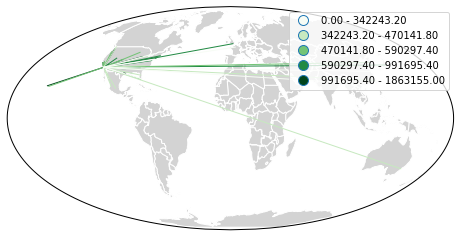

In [29]:
ax = gplt.sankey(
    la_flights, projection=gcrs.Mollweide(),
    hue='Passengers', cmap='Greens', legend=True
)
gplt.polyplot(
    world, ax=ax, facecolor='lightgray', edgecolor='white'
)
ax.set_global(); ax.outline_patch.set_visible(True)
plt.savefig('../figures/sankey/sankey-cmap.png', **savefig_kwargs)

/Users/alex/miniconda3/envs/geoplot-dev/lib/python3.6/site-packages/scipy/stats/stats.py:1633: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


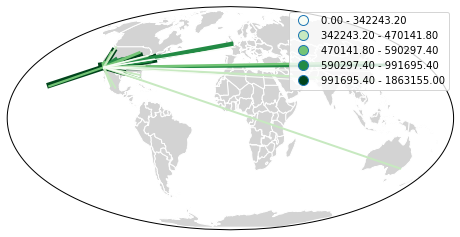

In [30]:
ax = gplt.sankey(
    la_flights, projection=gcrs.Mollweide(),
    scale='Passengers', limits=(1, 10),
    hue='Passengers', cmap='Greens', legend=True
)
gplt.polyplot(
    world, ax=ax, facecolor='lightgray', edgecolor='white'
)
ax.set_global(); ax.outline_patch.set_visible(True)
plt.savefig('../figures/sankey/sankey-scale.png', **savefig_kwargs)

/Users/alex/miniconda3/envs/geoplot-dev/lib/python3.6/site-packages/scipy/stats/stats.py:1633: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


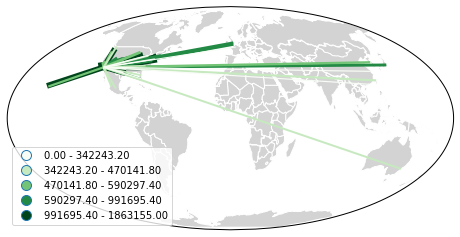

In [31]:
ax = gplt.sankey(
    la_flights, projection=gcrs.Mollweide(),
    scale='Passengers', limits=(1, 10),
    hue='Passengers', cmap='Greens',
    legend=True, legend_kwargs={'loc': 'lower left'}
)
gplt.polyplot(
    world, ax=ax, facecolor='lightgray', edgecolor='white'
)
ax.set_global(); ax.outline_patch.set_visible(True)
plt.savefig('../figures/sankey/sankey-legend-kwargs.png', **savefig_kwargs)

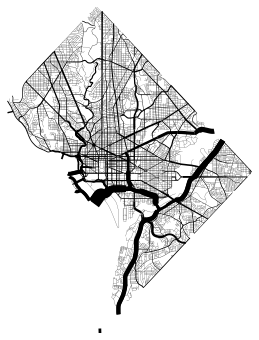

In [32]:
gplt.sankey(dc, scale='aadt', edgecolor='black', limits=(0.1, 10), projection=gcrs.AlbersEqualArea())
plt.savefig('../figures/sankey/sankey-dc.png', **savefig_kwargs)

## Voronoi

In [ ]:
boroughs = gpd.read_file(gplt.datasets.get_path('nyc_boroughs'))
injurious_collisions = gpd.read_file(gplt.datasets.get_path('nyc_injurious_collisions'))

In [ ]:
ax = gplt.voronoi(injurious_collisions.head(1000))
gplt.polyplot(boroughs, ax=ax)
plt.savefig('../figures/voronoi/voronoi-simple.png', **savefig_kwargs)

In [ ]:
ax = gplt.voronoi(injurious_collisions.head(1000), hue='NUMBER OF PERSONS INJURED', cmap='Reds')
gplt.polyplot(boroughs, ax=ax)
plt.savefig('../figures/voronoi/voronoi-cmap.png', **savefig_kwargs)

In [ ]:
ax = gplt.voronoi(injurious_collisions.head(1000), hue='NUMBER OF PERSONS INJURED', cmap='Reds', 
                  clip=boroughs)
gplt.polyplot(boroughs, ax=ax)
plt.savefig('../figures/voronoi/voronoi-clip.png', **savefig_kwargs)

In [ ]:
ax = gplt.voronoi(injurious_collisions.head(1000), hue='NUMBER OF PERSONS INJURED', cmap='Reds',
                  clip=boroughs.geometry,
                  legend=True, legend_kwargs={'loc': 'upper left'},
                  linewidth=0.5, edgecolor='white',
                 )
gplt.polyplot(boroughs, ax=ax)
plt.savefig('../figures/voronoi/voronoi-kwargs.png', **savefig_kwargs)

In [ ]:
ax = gplt.voronoi(injurious_collisions.head(1000), 
                  hue='NUMBER OF PERSONS INJURED', cmap='Reds', k=5, scheme='fisher_jenks',
                  clip=boroughs.geometry,
                  legend=True, legend_kwargs={'loc': 'upper left'},
                  linewidth=0.5, edgecolor='white', 
                 )
gplt.polyplot(boroughs, ax=ax)
plt.savefig('../figures/voronoi/voronoi-scheme.png', **savefig_kwargs)

In [ ]:
ax = gplt.voronoi(injurious_collisions.head(1000), hue='NUMBER OF PERSONS INJURED', cmap='Reds',
                  edgecolor='white', clip=boroughs.geometry,
                  legend=True,
                  linewidth=0.5
             )
gplt.polyplot(boroughs, linewidth=1, ax=ax)
plt.savefig('../figures/voronoi/voronoi-multiparty.png', **savefig_kwargs)

# Quadtree

In [ ]:
boroughs = gpd.read_file(gplt.datasets.get_path('nyc_boroughs'))
collisions = gpd.read_file(gplt.datasets.get_path('nyc_collision_factors'))

In [ ]:
gplt.quadtree(collisions, nmax=1)
plt.savefig('../figures/quadtree/quadtree-initial.png', **savefig_kwargs)

In [ ]:
gplt.quadtree(
    collisions, nmax=1,
    projection=gcrs.AlbersEqualArea(), clip=boroughs,
    facecolor='lightgray', edgecolor='white'
)
plt.savefig('../figures/quadtree/quadtree-clip.png', **savefig_kwargs)

TODO: debug!

In [ ]:
gplt.quadtree(
    collisions, nmax=1,
    projection=gcrs.AlbersEqualArea(), clip=boroughs,
    hue='NUMBER OF PEDESTRIANS INJURED', cmap='Reds', k=5,
    edgecolor='white', legend=True
)
plt.savefig('../figures/quadtree/quadtree-hue.png', **savefig_kwargs)

In [ ]:
gplt.quadtree(
    collisions, nmax=1,
    projection=gcrs.AlbersEqualArea(), clip=boroughs,
    hue='NUMBER OF PEDESTRIANS INJURED', cmap='Reds', agg=np.max,
    edgecolor='white', legend=True, k=None
)
plt.savefig('../figures/quadtree/quadtree-agg.png', **savefig_kwargs)

In [ ]:
ax = gplt.quadtree(
    collisions, nmax=1,
    projection=gcrs.AlbersEqualArea(), clip=boroughs,
    facecolor='lightgray', edgecolor='white', zorder=0
)
gplt.pointplot(
    collisions,
    s=1, ax=ax
)
plt.savefig('../figures/quadtree/quadtree-basemap.png', **savefig_kwargs)